## Algoritmo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, exp, pow

points = np.load('puntos2D_ej3.npy')

#Puntos iniciales
'''
A0 = 15.0
w0 = 0.6
phi0 = 0.0

'''

#FUNCTION
def residual_function(A, w, phi, points):
    n = len(points)
    res = np.zeros(n)
    for i in range(n):
        x, y = points[i][0], points[i][1]
        res[i] = A*sin(w*x+phi)-y
    return res
#JACOBIAN
def jacobian_residual(A, w, phi, points):
    n = len(points)
    jac = np.zeros([n, 3])
    for i in range(n):
        x, y = points[i][0], points[i][1]
        jac[i][0] = sin(w*x+phi)
        jac[i][1] = A*cos(w*x+phi)*x
        jac[i][2] = A*cos(w*x+phi)
    return jac


def levenberg_marquart(z0, points, mu_ref, N, tau):
    #N: numero maximo de iteraciones
    #tau: tolerancia - epsilon de la pagina 
    
    res = 0
    
    A0 = z0[0]
    w0 = z0[1]
    phi0 = z0[2]
    
    R0 = residual_function(A0, w0, phi0, points); 
    J0 = jacobian_residual(A0, w0, phi0, points);
    f0 = 0.5*np.dot(R0.T, R0)
    
    print("Valor inicial: ", f0)
    
    A = np.dot(J0.T, J0)
    g = np.dot(J0.T, R0)
    
    
    m = len(A)
    max_aii = A[0][0];
    
    for i in range(1, m):
        if (A[i][i] > max_aii):
            max_aii = A[i][i]
    
    mu = min(mu_ref, max_aii)
    I = np.identity(m)
    for k in range(N):
        #print("iteración: ", k)
        p = np.linalg.solve((A+mu*I) , -g)
        
        if (np.linalg.norm(p) < tau):
            res = 1
            print("El algoritmo convergió en la iteración: ", k+1)
            return z0, f, k, p
         
        z0 = z0 + p
        
        A0 = z0[0]
        w0 = z0[1]
        phi0 = z0[2]
        
        R0 = residual_function(A0, w0, phi0, points)
        f = 0.5*np.dot(R0.T, R0)
        
        #region de confianza
        rho = (f0 - f)/(-np.dot(p.T, np.dot(J0.T, R0))+0.5*mu*np.dot(p.T, p))
        if (rho < 0.25):
            mu = 2*mu
        elif (rho > 0.75):
            mu = mu/3
        
        f = f0
        J0 = jacobian_residual(A0, w0, phi0, points)
        A = np.dot(J0.T, J0)
        g = np.dot(J0.T, R0)
        
    return z0, f, k, p

In [2]:
z0 = [15.0, 0.6, 0.0]
mu_ref = 0.001
N = 5000
tau = np.sqrt(pow(np.finfo(float).eps, 1/4))
z, f, k, p = levenberg_marquart(z0, points, mu_ref, N, tau)

print("z_{k}: ", z)
print("f(z_{k}): ", f)
print("||p_{k}||: ", np.linalg.norm(p))
print("Número de iteraciones: ", k+1)

Valor inicial:  45454.05280978729
El algoritmo convergió en la iteración:  7
z_{k}:  [12.99599948  1.19938759 -5.67328839]
f(z_{k}):  45454.05280978729
||p_{k}||:  0.0001393870447214434
Número de iteraciones:  7


## Resultados gráficas

Text(0.5, 1.0, 'Levenberg - Marquart')

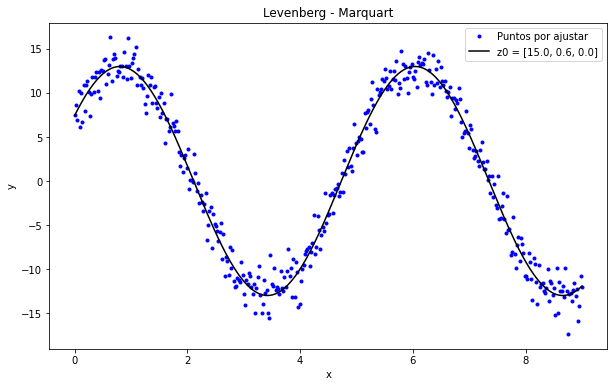

In [3]:
n = len(points)
puntos = np.zeros(n)
for i in range(n):
    x, y = points[i][0], points[i][1]
    puntos[i] = z[0]*sin(z[1]*x+z[2])
    
plt.figure(figsize = (10, 6))

x_puntos = np.linspace(min(points[:, 0]), max(points[:, 0]), n)
plt.plot(points[:,0], points[:,1], ".b", label = 'Puntos por ajustar')
plt.plot(x_puntos, puntos, '-k', label = 'z0 = [15.0, 0.6, 0.0]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Levenberg - Marquart')

## Con otro z inicial 

In [4]:
z0 = [15.0, 1.0, 0.0]
mu_ref = 0.001
N = 5000
tau = np.sqrt(pow(np.finfo(float).eps, 1/4))
z, f, k, p = levenberg_marquart(z0, points, mu_ref, N, tau)

print("z_{k}: ", z)
print("f(z_{k}): ", f)
print("||p_{k}||: ", np.linalg.norm(p))
print("Número de iteraciones: ", k+1)

Valor inicial:  40807.16289819636
El algoritmo convergió en la iteración:  34
z_{k}:  [-12.99605762  -1.19936531  -6.89318307]
f(z_{k}):  40807.16289819636
||p_{k}||:  2.006993321640592e-05
Número de iteraciones:  34


Text(0.5, 1.0, 'Levenberg - Marquart')

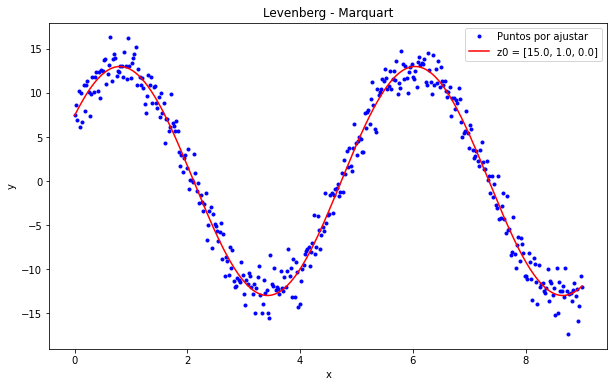

In [5]:
n = len(points)
puntos = np.zeros(n)
for i in range(n):
    x, y = points[i][0], points[i][1]
    puntos[i] = z[0]*sin(z[1]*x+z[2])
    
plt.figure(figsize = (10, 6))

x_puntos = np.linspace(min(points[:, 0]), max(points[:, 0]), n)
plt.plot(points[:,0], points[:,1], ".b", label = 'Puntos por ajustar')
plt.plot(x_puntos, puntos, '-r', label = 'z0 = [15.0, 1.0, 0.0]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Levenberg - Marquart')

## Otro punto

In [6]:
z0 = [15.0, 0.6, 1.6]
mu_ref = 0.001
N = 5000
tau = np.sqrt(pow(np.finfo(float).eps, 1/4))
z, f, k, p = levenberg_marquart(z0, points, mu_ref, N, tau)

print("z_{k}: ", z)
print("f(z_{k}): ", f)
print("||p_{k}||: ", np.linalg.norm(p))
print("Número de iteraciones: ", k+1)

Valor inicial:  37048.62007346928
z_{k}:  [ -0.19071224 -31.807208    72.68240361]
f(z_{k}):  37048.62007346928
||p_{k}||:  0.5978166364652602
Número de iteraciones:  5000


Text(0.5, 1.0, 'Levenberg - Marquart')

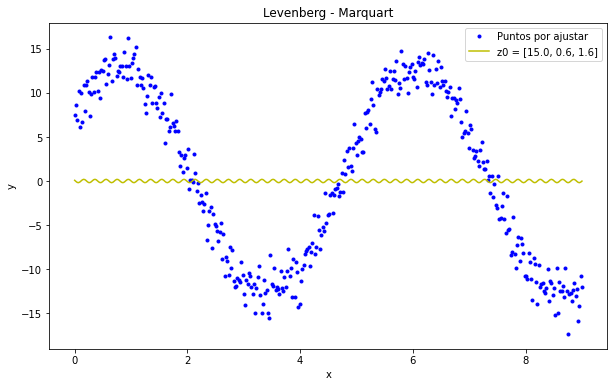

In [7]:
n = len(points)
puntos = np.zeros(n)
for i in range(n):
    x, y = points[i][0], points[i][1]
    puntos[i] = z[0]*sin(z[1]*x+z[2])
    
plt.figure(figsize = (10, 6))

x_puntos = np.linspace(min(points[:, 0]), max(points[:, 0]), n)
plt.plot(points[:,0], points[:,1], ".b", label = 'Puntos por ajustar')
plt.plot(x_puntos, puntos, '-y', label = 'z0 = [15.0, 0.6, 1.6]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Levenberg - Marquart')